In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/daily_wifi.csv')

In [3]:
df.head()

,date,mac,detections,signal_strength,last_detected,first_detected,seconds
0,2018-10-06,PjOOBPVR73guI8UfnwkfCA==,419,50,2018-10-06 22:46:00,2018-10-06 21:29:00,11700
1,2018-10-26,PjOOBPVR73guI8UfnwkfCA==,145,52,2018-10-26 22:46:00,2018-10-26 22:16:00,3000
2,2018-05-08,wxMfL3C1oVnPDyKPeW9OIA==,87,68,2018-05-08 11:31:00,2018-05-08 11:16:00,1500
3,2018-05-08,LU8KXGRwrZYQSBXyZHYTZQ==,85,70,2018-05-08 11:31:00,2018-05-08 11:16:00,1500
4,2018-05-08,oVqI+pIguLG/djxsq7WGLQ==,84,68,2018-05-08 11:31:00,2018-05-08 11:16:00,1500


Filter stays longer than 4 hours and shorter than 5 minutes.

In [4]:
filteredMacs = df[np.logical_and(df['seconds'] < 4*3600, df['seconds'] > 300)]

In [5]:
filteredMacs.head()

,date,mac,detections,signal_strength,last_detected,first_detected,seconds
0,2018-10-06,PjOOBPVR73guI8UfnwkfCA==,419,50,2018-10-06 22:46:00,2018-10-06 21:29:00,11700
1,2018-10-26,PjOOBPVR73guI8UfnwkfCA==,145,52,2018-10-26 22:46:00,2018-10-26 22:16:00,3000
2,2018-05-08,wxMfL3C1oVnPDyKPeW9OIA==,87,68,2018-05-08 11:31:00,2018-05-08 11:16:00,1500
3,2018-05-08,LU8KXGRwrZYQSBXyZHYTZQ==,85,70,2018-05-08 11:31:00,2018-05-08 11:16:00,1500
4,2018-05-08,oVqI+pIguLG/djxsq7WGLQ==,84,68,2018-05-08 11:31:00,2018-05-08 11:16:00,1500


In [6]:
aggregations = filteredMacs.groupby('mac').agg({'seconds' : ['sum','max','mean'], 'detections' : ['count'],'last_detected':['max']})


In [7]:
aggregations.columns = ['_'.join(col).strip() for col in aggregations.columns.values]

In [8]:
aggregations

,seconds_sum,seconds_max,seconds_mean,detections_count,last_detected_max
mac,,,,,
+8s9FVOE/OsSVhjIY5RNXg==,4400,4400,4400.000000,1,2018-07-10 10:02:00
+G820S6yIyVwks68tUlOug==,500,500,500.000000,1,2018-10-16 07:14:00
+M57VBg70V19n6z/lgFzgQ==,8400,8400,8400.000000,1,2018-07-10 14:37:00
+ZHWu5o4oScrbBVc8INkCg==,400,400,400.000000,1,2018-05-10 13:28:00
+nis6ew2FVYaFhQmp7NyNg==,9300,9300,9300.000000,1,2018-11-21 11:50:00
+oR33EJbsNuueAlOT0kECh06P02XDKYl,11900,11900,11900.000000,1,2018-07-09 13:35:00
/G2WXOLtCJ8SVhjIY5RNXg==,9800,9800,9800.000000,1,2019-01-29 14:07:00
/Sp2HlKM5TkK0jYrt1N+tg==,400,400,400.000000,1,2018-07-16 09:34:00
09ytMg66asF8MfuPZWI/Yw==,8500,8500,8500.000000,1,2019-01-12 20:17:00


(array([129.,  48.,  28.,  27.,  40.,  34.,  23.,  43.,  36.,  18.]),
 array([  400.,  1550.,  2700.,  3850.,  5000.,  6150.,  7300.,  8450.,
         9600., 10750., 11900.]),
 <a list of 10 Patch objects>)

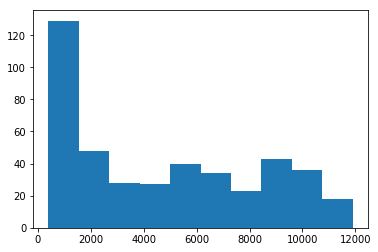

In [9]:
plt.hist(aggregations['seconds_mean'])

Let's plot the repetitions histogram without the single repetitions (i.e. no repetition).

(array([29., 13.,  6.,  0.,  5.,  1.,  0.,  2.,  1.,  2.]),
 array([2. , 2.7, 3.4, 4.1, 4.8, 5.5, 6.2, 6.9, 7.6, 8.3, 9. ]),
 <a list of 10 Patch objects>)

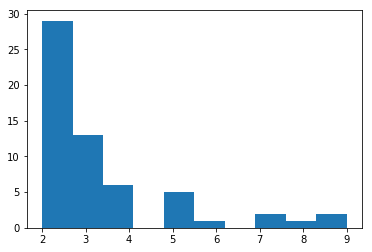

In [10]:
plt.hist(aggregations[aggregations['detections_count']>1]['detections_count'])

### Compute scores to normalize data.
Here the \*_score means a simple normalization (i.e. (value-min)*100/(max-min)) and *_quintile is the quintile score for the data.

In [11]:
max_seconds = max(aggregations['seconds_mean'])
min_seconds = min(aggregations['seconds_mean'])

In [12]:
aggregations['seconds_score'] = (aggregations['seconds_mean'] - min_seconds) * 100 / (max_seconds - min_seconds)


In [13]:
max_count = max(aggregations['detections_count'])

In [14]:
aggregations['count_score'] = (aggregations['detections_count'] - 1) * 100 / (max_count-1)

In [15]:
max_recency = max(aggregations['last_detected_max'])

In [16]:
aggregations['recency'] = pd.to_datetime(max_recency) - pd.to_datetime(aggregations['last_detected_max'])


In [17]:
aggregations['recency'] = aggregations['recency'].dt.days
max_recency = max(aggregations['recency'])
min_recency = min(aggregations['recency'])

In [18]:
aggregations['recency_score'] = (aggregations['recency'] - min_recency) * 100 / (max_recency-min_recency)

In [19]:
aggregations[aggregations['count_score']>0].count() / aggregations.count()

seconds_sum          0.138498
seconds_max          0.138498
seconds_mean         0.138498
detections_count     0.138498
last_detected_max    0.138498
seconds_score        0.138498
count_score          0.138498
recency              0.138498
recency_score        0.138498
dtype: float64

In [20]:
rfm = aggregations[['seconds_mean','detections_count','recency','seconds_score','count_score','recency_score']]
rfm.columns = ['seconds','detections','recency','seconds_score','count_score','recency_score']

In [21]:
rfm_scores = aggregations[['seconds_score','count_score','recency_score']]
#rfm_scores = rfm_scores.set_index('mac',drop=True)

In [22]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(rfm_scores)
    wcss.append(kmeans.inertia_)

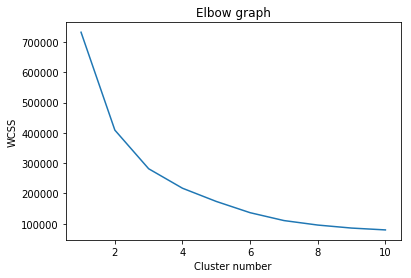

In [23]:
plt.plot(range(1,11), wcss)
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

In [24]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
cluster = kmeans.fit_predict(rfm_scores)

In [25]:
rfm['cluster'] = cluster

/usr/local/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5,0,'Seconds')

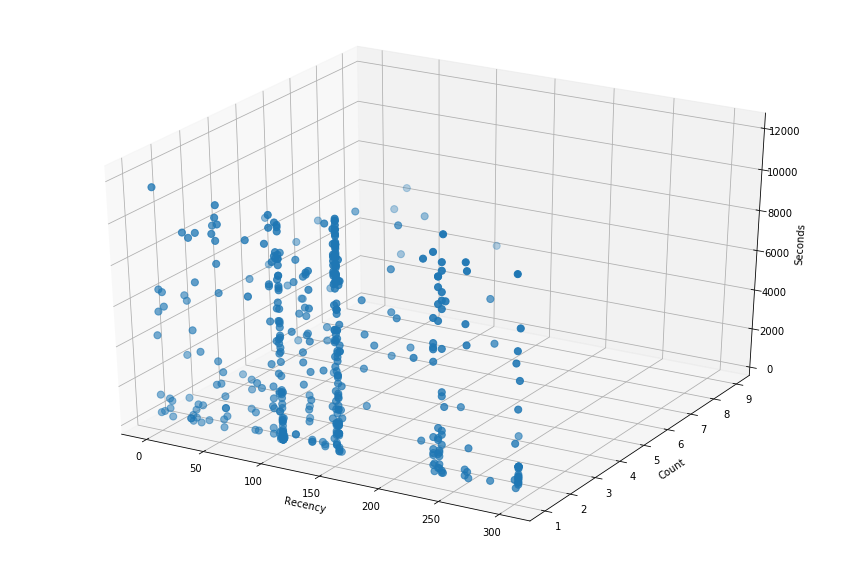

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm.recency, rfm.detections, rfm.seconds, s=50)

ax.set_xlabel('Recency')
ax.set_ylabel('Count')
ax.set_zlabel('Seconds')


Text(0,0.5,'Stay')

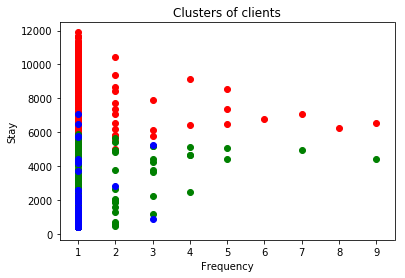

In [27]:
c1 = rfm[rfm.cluster == 0]
c2 = rfm[rfm.cluster == 1]
c3 = rfm[rfm.cluster == 2]

plt.scatter(c1.detections, c1.seconds, c = 'red', label = 'Cluster 1')
plt.scatter(c2.detections, c2.seconds, c = 'green', label = 'Cluster 2')
plt.scatter(c3.detections, c3.seconds, c = 'blue', label = 'Cluster 3')

plt.title('Clusters of clients')
plt.xlabel('Frequency')
plt.ylabel('Stay')

Text(0,0.5,'Stay')

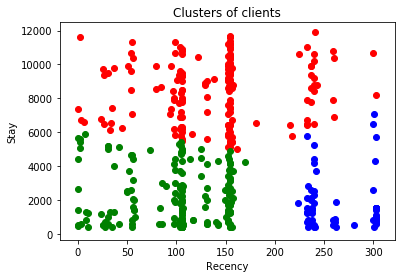

In [28]:
c1 = rfm[rfm.cluster == 0]
c2 = rfm[rfm.cluster == 1]
c3 = rfm[rfm.cluster == 2]

plt.scatter(c1.recency, c1.seconds, c = 'red', label = 'Cluster 1')
plt.scatter(c2.recency, c2.seconds, c = 'green', label = 'Cluster 2')
plt.scatter(c3.recency, c3.seconds, c = 'blue', label = 'Cluster 3')

plt.title('Clusters of clients')
plt.xlabel('Recency')
plt.ylabel('Stay')

Text(0,0.5,'Recency')

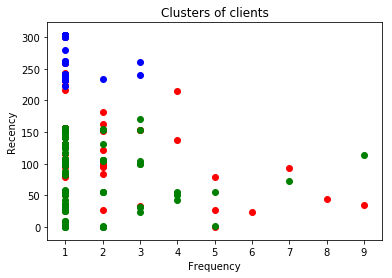

In [29]:
c1 = rfm[rfm.cluster == 0]
c2 = rfm[rfm.cluster == 1]
c3 = rfm[rfm.cluster == 2]

plt.scatter(c1.detections, c1.recency, c = 'red', label = 'Cluster 1')
plt.scatter(c2.detections, c2.recency, c = 'green', label = 'Cluster 2')
plt.scatter(c3.detections, c3.recency, c = 'blue', label = 'Cluster 3')

plt.title('Clusters of clients')
plt.xlabel('Frequency')
plt.ylabel('Recency')

In [30]:
c1.count()['cluster']

175

In [31]:
c2.count()['cluster']

190

In [32]:
c3.count()['cluster']

61

## DBSCAN

In [33]:
from sklearn.cluster import DBSCAN

In [34]:
dbs = DBSCAN(eps=0.5, min_samples=5)
dbs = dbs.fit(rfm)

In [35]:
dbs.labels_[0:50]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [36]:
id_clusters = np.unique(dbs.labels_)
print('Found {} clusters'.format(len(id_clusters)))
np.unique(dbs.labels_, return_counts=True)

Found 3 clusters


(array([-1,  0,  1]), array([412,   7,   7]))

In [37]:
dbs.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

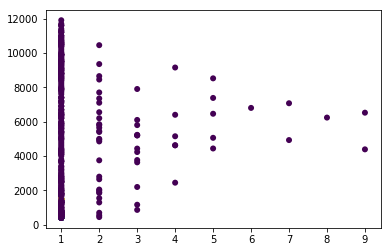

In [38]:
plt.scatter(rfm['detections'], rfm['seconds'], c=dbs.labels_,linewidths=0)

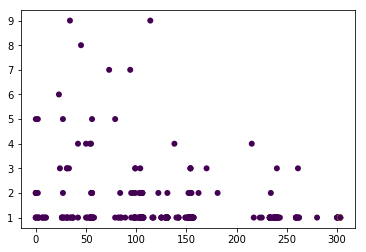

In [39]:
plt.scatter(rfm['recency'], rfm['detections'], c=dbs.labels_,linewidths=0)

DBSCAN seems to yield very bad results here...

## Hierarchical (TBD)

In [40]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [41]:
Z = linkage(rfm, 'ward') #'single', 'ward', ...

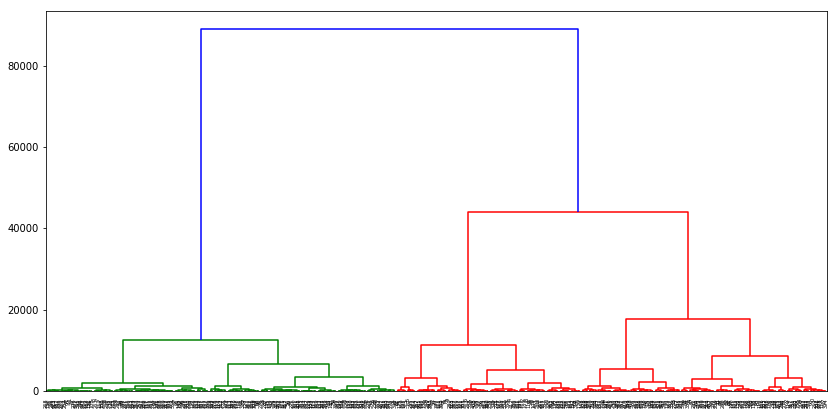

In [42]:
plt.figure(figsize=(14, 7))
dendrogram(Z)
plt.show()

In [43]:
cut_distance = 5000
clusters_hc = fcluster(Z, t = cut_distance, criterion='distance')
np.unique(clusters_hc, return_counts = True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int32),
 array([89, 28, 74, 36, 31, 34, 27, 27, 44, 36]))

## Statistics

Repetition rate (percentage)

In [44]:
rfm[rfm['count_score']>1].count()['cluster'] * 100/rfm.count()['cluster']

13.849765258215962

Median stay (seconds)

In [45]:
np.median(rfm[rfm['detections']==1]['seconds'])

3700.0

In [46]:
np.median(rfm[rfm['detections']>1]['seconds'])

5150.0

Median recency (days)

In [47]:
np.median(rfm[rfm['detections']>1]['recency'])

99.0

Median repetitions (when someone repeats)

In [48]:
np.median(aggregations[aggregations['detections_count']>1]['detections_count'])

3.0

In [49]:
np.median(rfm[rfm['detections']>1]['detections'])

3.0

## Time series for repetitions and stay

In [50]:
start = pd.to_datetime(min(df['date']))
end = pd.to_datetime(max(df['date']))

In [51]:
def getRepetitionsAndStay(date):
    today = start
    total = 0
    repeated = 0
    stay = 0
    
    timeFiltered = filteredMacs[filteredMacs['date'] <= date.strftime('%Y-%m-%d')]
    
    aggregations = timeFiltered.groupby('mac').agg({'seconds' : ['mean'], 'detections' : ['count']})
    aggregations.columns = ['_'.join(col).strip() for col in aggregations.columns.values]
    
    
    sliceCount = aggregations[aggregations['detections_count']>1]

    return ({'date':date,'repetitions':sliceCount['detections_count'].count(),'total':aggregations['detections_count'].count(),'secondsMean':aggregations['seconds_mean'].mean()})
    
    

In [52]:
today = start

timeSeries = []
while today <= end:        
    timeSeries.append(getRepetitionsAndStay(today))
    today = (today + pd.DateOffset(days=1))

In [53]:
timeSeries = pd.DataFrame(timeSeries)

In [54]:
timeSeries.to_csv("/tmp/wifi_recurrency.csv")

In [55]:
rfm.to_csv("/tmp/wifi_rfs.csv")